# Diplomado Ciencia de Datos
## Procesamiento de Lenguaje Natural
### Análisis de Sentimiento en la Red Social Twitter

#### 3. Análisis de Sentimiento con Volumen

Referencia: https://huggingface.co/docs/transformers/model_doc/roberta

In [1]:
# Preparación de módulos requeridos

from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [1]:
# Preparación de biblioteca de manipulación de datos

import pandas as pd

In [60]:
# Carga de datos recuperados en el paso de adquisición

tweets = pd.read_csv('tweets.csv', index_col = [0])

In [63]:
# Preprocesamiento de tweets

tweets_proc = []

for i in range(len(tweets)):
    tweet = tweets.loc[i, "Tweet"]

    tweet_words = []
    tweet_proc = []

    for word in tweet.split(' '):
        if word.startswith('@') and len(word) > 1:
            word = '@user'
        elif word.startswith('http'):
            word = "http"
        tweet_words.append(word)

    tweet_proc = " ".join(tweet_words)
    tweets_proc.append(tweet_proc)

In [64]:
len(tweets_proc)

20877

In [7]:
df = pd.DataFrame (tweets_proc, columns = ['tweet_proc'])
df.to_csv('tweets_proc.csv', index=False)

In [78]:
# Carga del modelo y tokenizer

roberta = "cardiffnlp/twitter-roberta-base-sentiment"

model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)

labels = ['Negative', 'Neutral', 'Positive']

In [84]:
# Ejecución del modelo de análisis de sentimiento en cada tweet

all_scores = []

results = {"Index":[],"Label":[],"Score":[]};

for i in range(len(tweets_proc)):
    encoded_tweet = tokenizer(tweets_proc[i], return_tensors='pt', max_length=210, truncation=True, padding=True)
    output = model(**encoded_tweet)
    
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    
    mscore = 0
  
    for j in range(len(scores)):
        l = labels[j]
        s = scores[j]
        all_scores.append(s)
        if s > mscore:
            mscore = s
            mlabel = l
    
    results["Index"].append(i)
    results["Score"].append(mscore)
    results["Label"].append(mlabel)


In [ ]:
# Descarga de resultados del modelo en texto

df = pd.DataFrame([results])
df.to_csv('results.csv', index=False)

In [211]:
# Procesamiento final
# Por complejidad de anidación de diccionario se prepararon datasets en shell

# Carga de tweets preprocesados
tweets = pd.read_csv('tweets_proc.csv')

# Carga de scores calculados
scored = pd.read_csv('scored.csv')

In [212]:
scored

,Index,Label,Score
0,0,Neutral,0.868132
1,1,Neutral,0.797576
2,2,Neutral,0.852179
3,3,Neutral,0.868574
4,4,Neutral,0.891520
...,...,...,...
20872,20872,Neutral,0.883631
20873,20873,Neutral,0.813762
20874,20874,Neutral,0.858146
20875,20875,Neutral,0.844760


In [213]:
# Preparación de resultados

import matplotlib.pyplot as plt

# Se cuenta el número de tweets por sentimiento
sentiment_counts = scored.groupby(['Label']).size()
print(sentiment_counts)

Label
Negative      331
Neutral     19929
Positive      617
dtype: int64


<AxesSubplot:>

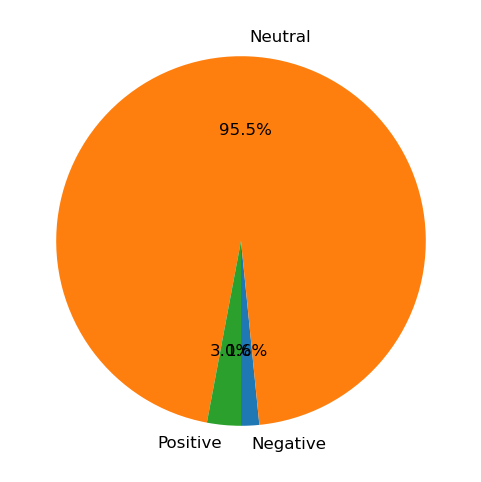

In [216]:
# Visualización de resultados por sentimiento

# Se muestra un resumen para visualización
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

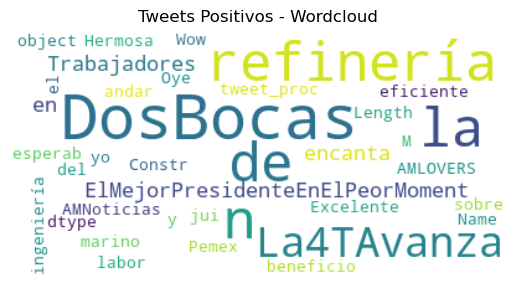

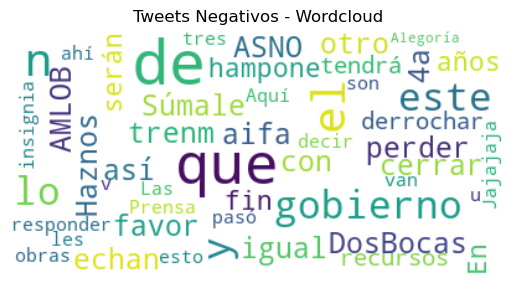

In [223]:
# Elaboración de nube de palabras de tweets recopilados

from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Se elabora una nube de palabras con sentimiento positivo
positive_tweets = tweets['tweet_proc'][scored["Label"] == 'Positive']
stop_words = ["https", "co", "user", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Tweets Positivos - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Se elabora una nube de palabras con sentimiento negativo
negative_tweets = tweets['tweet_proc'][scored["Label"] == 'Negative']
stop_words = ["https", "co", "user", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Tweets Negativos - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()